Istraživanje kojim se bavimo u sklopu Projekta po svojoj svrsi spada u primijenjeno istraživanje jer je cilj pokazati primjenu 
strojnog učenja u medicini, a prema izvoru informacija spada u sekundarno istraživanje jer su podaci dobiveni iz drugih dokumenata. Prema vremenu provedbe ovo istraživanje spada u sinkrono istraživanje, to jest studiju presjeka jer koristimo podatke dobivene iz određenog podskupa pacijenata.
Prema vrsti korištenih podataka istraživanje spada pod kvantitativna istraživanja jer koristimo mjerljive varijable kako bi objasnili/predvidjeli određenu pojavu, a prema načinu prikupljanja pod laboratorijsko  istraživanje jer su korišteni podaci dobiveni iz digitalizirane slike aspirata mase dojke, dobivenih finom iglom (FNA postupak, to je posebna vrsta biopsije). S obzirom na stupanj manipulacije varijablama, istraživanje spada pod eksperimentalno jer pokušava objasniti uzročno-posljedične veze. Istraživanje se temelji na donošenju zaključaka uz pomoć raspoloživih podataka pa spada u istraživačka istraživanja. Prema vrsti zaključka istraživanje spada u hipotetičko-deduktivno istraživanje jer kroz promatranje stvarnosti pokušava donijeti zaključke.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [32]:
#ucitavanje i ispis dataFrame-a
data = pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [33]:
#pregled značajki
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [34]:
#provjera postoje li NA vrijednosti
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [35]:
#mozda možemo izbaciti neke stršeće podatke - u radu to nisu radili pa zasada nećemo..
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


c:\users\lovro\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

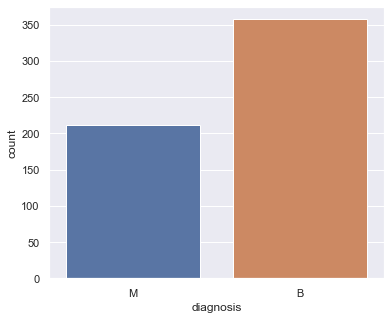

In [36]:
#graf 1
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(data['diagnosis'])

c:\users\lovro\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radius_mean', ylabel='count'>

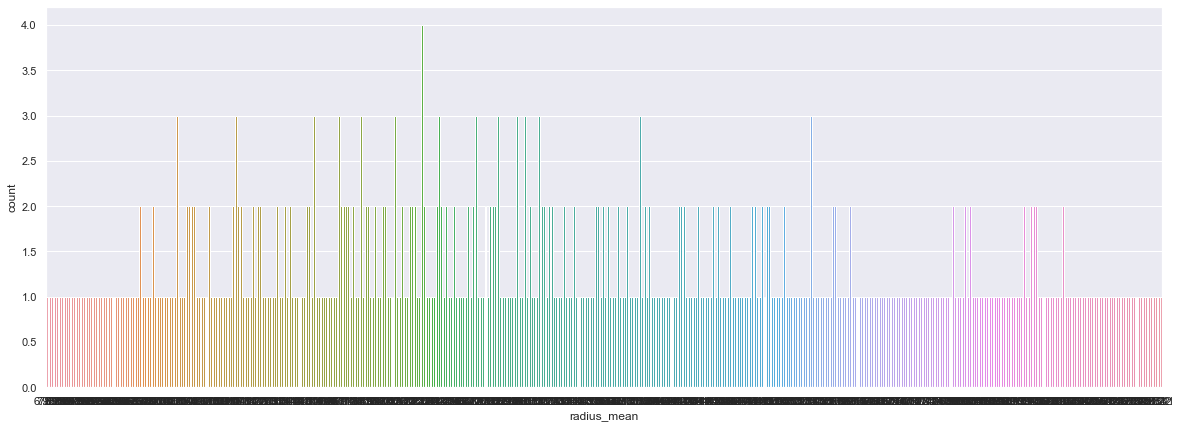

In [37]:
#graf 2
sns.set(rc={'figure.figsize':(20, 7)})
sns.countplot(data['radius_mean'])

In [38]:
le = LabelEncoder()
le.fit(data.loc[:, 'diagnosis'])
data.loc[:, 'diagnosis'] = le.transform(data.loc[:,'diagnosis'])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [39]:
pd.unique(data.diagnosis)

array([1, 0])

In [40]:
data_tmp = data.loc[:, ~data.columns.isin(['id', 'Unnamed: 32'])]

In [41]:
data_tmp.shape

(569, 31)

In [42]:
#odabirem značajke za reproduciranje njihovog grafa korelacija
corr_features= ['diagnosis']
for c in data.columns:
    if 'mean' in c:
        corr_features.append(c)

<AxesSubplot:>

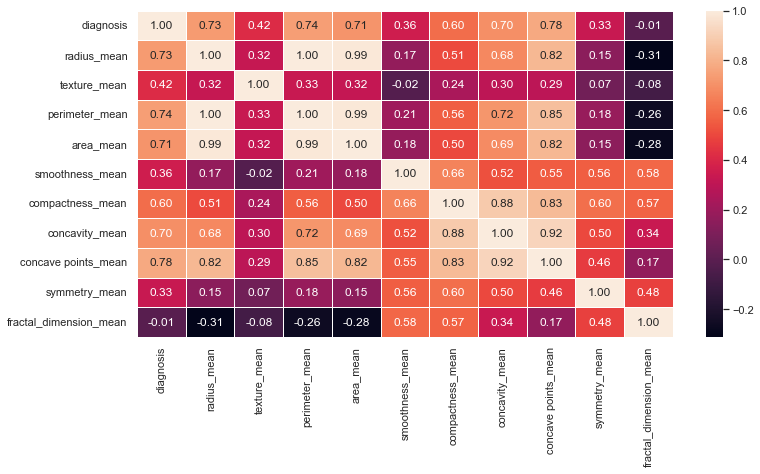

In [43]:
#graf 3
data_corr = data_tmp.loc[:, corr_features]
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(data_corr.corr(), annot=True, fmt=".2f", linewidths=.5)

In [44]:
correlations = data_tmp.corr()
y_corr = correlations.iloc[0,:]

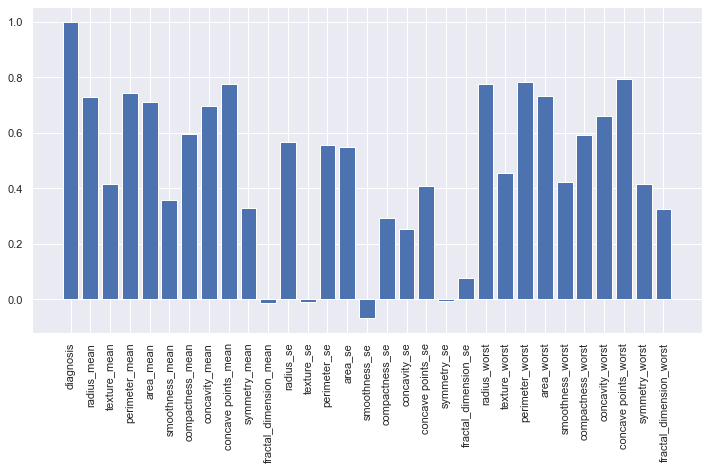

In [45]:
#graf 4
plt.bar(correlations.index.values, y_corr)
plt.xticks(rotation='vertical')
plt.show()

Selekcija značajki: izbacivanje značajki koje prema grafu 4 gotovo uopće ne utjeću na oznaku dijagnoze(M/B), odnosno koje imaju najmanju korelaciju sa izlaznom varijablom.

In [46]:
data_X_filtred = np.copy(data_tmp.loc[:, ~data_tmp.columns.isin(['diagnosis', 'fractal_dimension_mean', 'texture_se', 'symmetry_se'])])
data_Y_filtered = np.copy(data_tmp.loc[:, 'diagnosis'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data_X_filtred, data_Y_filtered, test_size=0.25, random_state=42)

In [48]:
#LOGISTIC REGRESSION
model = LogisticRegression(penalty='none', max_iter=1500)#provjeri kakvi su defaultni parametri...regularizacija
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('--Logistic Regression--')
print('Training accuracy: {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('Testing accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))

--Logistic Regression--
Training accuracy: 96.95%
Testing accuracy: 97.20%


c:\users\lovro\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
#KNN
model = KNeighborsClassifier(n_neighbors=5, weights='distance')#probaj i sa 3/5 neighboura ili tezinama
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('--KNN--')
print('Training accuracy: {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('Testing accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))

--KNN--
Training accuracy: 100.00%
Testing accuracy: 95.80%


In [50]:
#Decision Tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('--Decision Tree--')
print('Training accuracy: {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('Testing accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))

--Decision Tree--
Training accuracy: 100.00%
Testing accuracy: 94.41%


In [51]:
#Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('--Naive Bayes--')
print('Training accuracy: {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('Testing accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))

--Naive Bayes--
Training accuracy: 93.66%
Testing accuracy: 95.80%


In [52]:
#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('--Random Forest--')
print('Training accuracy: {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('Testing accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))

--Random Forest--
Training accuracy: 100.00%
Testing accuracy: 96.50%


--SVM--
Training accuracy: 95.54%
Testing accuracy: 96.50%


<AxesSubplot:>

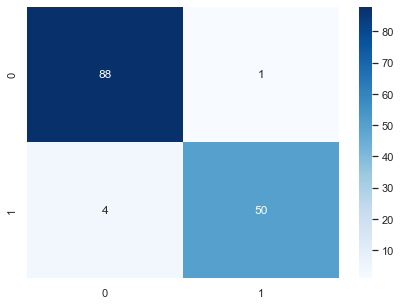

In [53]:
#SVM i graf 6
model = SVC(C=1000) 
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('--SVM--')
print('Training accuracy: {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('Testing accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(conf_matrix, annot=True, cmap='Blues')